In [26]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt
import matplotlib
import matplotlib
import scipy.stats
import tools

In [27]:
cancer = 'ovarian'
genes = list(pd.read_table('data/'+cancer+'/mmr_mutation.txt')['COMMON'])

In [38]:
df2 = tools.load_ces('data/'+cancer+'/ces_expr.txt')
df3 = tools.load_data('data/'+cancer+'/mmr_expr.txt', cat='expr')
df4 = tools.load_data('data/'+cancer+'/mmr_mutation.txt', cat='mut')
df5 = tools.load_mutation('data/'+cancer+'/cna_mutation.txt')
df = df2.merge(df3, right_index=True, left_index=True, how='outer')
df = df.merge(df4, left_index=True, right_index=True, how='outer')
df = df.merge(df5, left_index=True, right_index=True, how='outer')
# df = df.merge(df4, left_on='Sample ID', right_index=True)
df.head()

,ces,MLH1_expr,MLH3_expr,MSH2_expr,MSH3_expr,MSH6_expr,PCNA_expr,PMS2_expr,RFC1_expr,MLH1_mut,MLH3_mut,MSH2_mut,MSH3_mut,MSH6_mut,PCNA_mut,PMS2_mut,RFC1_mut,Sample ID,Mutation Count,CNA
TCGA-04-1331-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-04-1332-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-04-1336-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-04-1337-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-04-1338-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


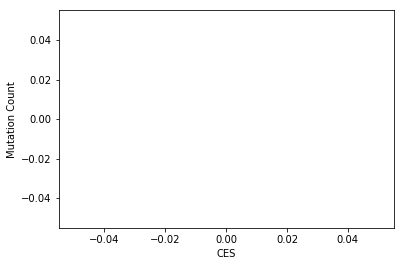

In [42]:
plt.scatter(df['ces'],df['Mutation Count'])
plt.xlabel('CES')
plt.ylabel('Mutation Count')
plt.show()

# MSI status in function of gene expression

If the tumor is is in the lower 10% for one gene expression, it is labelled as MSI.

In [46]:
df = tools.get_msi_status(df,threshs = [0.1,0.05], genes_full= ['MLH1','MSH2'] , 
                          genes_part= ['MSH6','PMS2','MSH3','MLH3','RFC1','PCNA'])
df['msi_status'].unique()

array([ 0.,  1.])

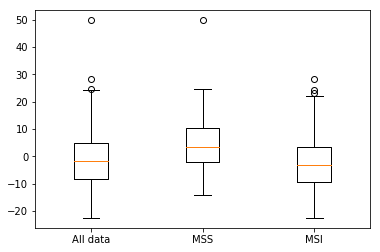

In [57]:
data = [df['ces'].dropna(), df[df['msi_status']==0.]['ces'].dropna(),df[df['msi_status']==1.]['ces'].dropna() ]
plt.figure()
plt.boxplot(data)
plt.xticks([1, 2, 3], ['All data','MSS','MSI'])
plt.show()

# MSI status in function of mutation

If one the the gene in the pathway is mutated, the tumor is classified as MSI.

In [58]:
for g in genes:
    no_mutations = pd.isnull(df[g+'_mut'])
    for ix in no_mutations[no_mutations==False].index:
        df = df.set_value(ix,'msi_status',1)

In [59]:
msi = df[df['msi_status']>=0.9]
print(str(len(msi)/float(len(df))*100) + '% of tumors are presumed MSI tumors')
print('Usually 15% of colorectal cancers are MMR deficient.')
print(str(float(np.sum(msi['Mutation Count']>400))/float(len(msi))*100) + '% of presumed MSI tumors have more than 400 mutations')
print(str(float(np.sum(msi['Mutation Count']>400))*100./len(df[df['Mutation Count']>400]))+'% of tumors with more than 400 mutations are presumably MSI.')
print(str(float(np.sum(df['msi_status']==0.99))*100./len(msi))+'% of tumors are MSI because they have 2 underexpressed genes.')

23.518164435946463% of tumors are presumed MSI tumors
Usually 15% of colorectal cancers are MMR deficient.
0.0% of presumed MSI tumors have more than 400 mutations


ZeroDivisionError: float division by zero

# CES, Mutations and MRR status

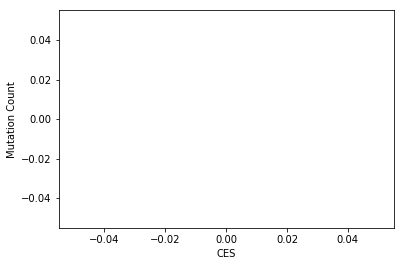

In [60]:
plt.scatter(df['ces'],df['Mutation Count'],c=df['msi_status'],cmap=plt.cm.Set1,marker='o')
plt.xlabel('CES')
plt.ylabel('Mutation Count')
plt.show()

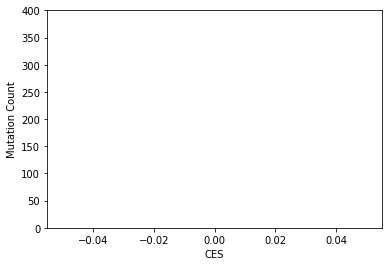

In [61]:
plt.scatter(df['ces'],df['Mutation Count'],c=df['msi_status'],cmap=plt.cm.Set1,marker='o')
plt.xlabel('CES')
plt.ylim(0,400)
plt.ylabel('Mutation Count')
plt.show()

In [62]:
print('Spearman Correlation P-value between CES and mutation for:')
print('MSS tumors')
print(scipy.stats.spearmanr(df[df['msi_status']==0]['ces'], df[df['msi_status']==0]['Mutation Count']).pvalue)
print('MSI tumors')
print(scipy.stats.spearmanr(df[df['msi_status']==1]['ces'], df[df['msi_status']==1]['Mutation Count']).pvalue)
print('All tumors')
print(scipy.stats.spearmanr(df['ces'], df['Mutation Count']).pvalue)

Spearman Correlation P-value between CES and mutation for:
MSS tumors


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


TypeError: unorderable types: NoneType() < float()

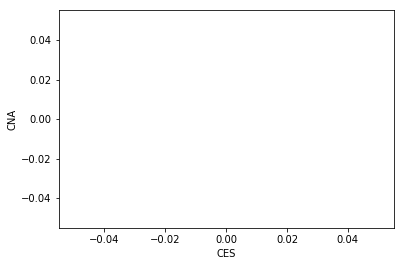

In [63]:
plt.scatter(df['ces'],df['CNA'],c=df['msi_status'],cmap=plt.cm.Set1,marker='o')
plt.xlabel('CES')
plt.ylabel('CNA')
plt.show()

In [64]:
tools.boxplotcomp()
for g in genes:
    tools.boxplotcomp(g)

TypeError: boxplotcomp() missing 2 required positional arguments: 'df' and 'genes'